In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/grieve')

Mounted at /content/grieve


In [ ]:
df=pd.set_option('display.max_colwidth',100)
df

In [ ]:
df=pd.read_csv('/content/grieve/MyDrive/Colab Notebooks/project ml/fake news /test.csv')
df1=pd.read_csv('/content/grieve/MyDrive/Colab Notebooks/project ml/fake news /submit.csv')


In [ ]:
df['label']=df1['label']
df.dropna(inplace=True)

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
import re
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.corpus import stopwords as s
wn=WordNetLemmatizer()
stop_words=s.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import string
def clean_text(text):
  remov_pun=''.join([c for c in text if c not in string.punctuation])
  tokens=re.split('\W+',remov_pun)
  text=[ wn.lemmatize(word) for word in tokens if word not in stop_words]
  return text

df['clean_text']=df['text'].apply(lambda x:clean_text(x.lower()))

In [ ]:
df.drop(['title','author','id'],axis='columns',inplace=True)
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer=clean_text)
x=cv.fit(df['text'])
x=cv.transform(df['text'])
u=pd.DataFrame(x.toarray())
df2=pd.DataFrame(x.toarray(),columns=cv.get_feature_names())


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import precision_score,recall_score,auc,roc_curve,f1_score
from sklearn.model_selection import train_test_split



In [ ]:
names=["KNN","Linear_SVM","RBF_SVM","Decision Tree","RFC","MultinomialNB" ,"PassiveAggressiveClassifier","Logistic"]

In [ ]:
classifier=[KNeighborsClassifier(3),
            SVC(kernel='linear',C=1),
            SVC(kernel='rbf',C=8),
            DecisionTreeClassifier(),
            RandomForestClassifier(),
            MultinomialNB(),
            PassiveAggressiveClassifier(),
            LogisticRegression()]


In [ ]:
y=df.label
y

0       0
2       0
3       1
4       1
6       1
       ..
5194    1
5195    0
5196    1
5197    0
5199    0
Name: label, Length: 4575, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test =train_test_split(x,y,random_state=10,train_size=0.6)



In [ ]:
model_column=[ ]
DF=pd.DataFrame(columns=model_column)
index=0
for name,clf in zip(names,classifier):
  clf.fit(x_train,y_train)
  DF.loc[index,'classifier']=name
  DF.loc[index,'Train_Accuracy']=clf.score(x_train,y_train)
  DF.loc[index,'Test_Accuracy']=clf.score(x_test,y_test)
  DF.loc[index,'Precision']=precision_score(y_test,clf.predict(x_test))
  DF.loc[index,'Recall']=recall_score(y_test,clf.predict(x_test))
  DF.loc[index,'f1']=f1_score(y_test,clf.predict(x_test))


  index+=1

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
DF

,classifier,Train_Accuracy,Test_Accuracy,Precision,Recall,f1
0,KNN,0.684882,0.610383,0.563380,1.000000,0.720721
1,Linear_SVM,1.000000,0.957377,0.940377,0.977174,0.958422
2,RBF_SVM,1.000000,0.964481,0.958199,0.971739,0.964922
3,Decision Tree,1.000000,0.842623,0.829854,0.864130,0.846645
4,RFC,1.000000,0.937158,0.904523,0.978261,0.939948
5,MultinomialNB,0.888889,0.700546,0.892405,0.459783,0.606887
6,PassiveAggressiveClassifier,1.000000,0.780328,0.772632,0.797826,0.785027
7,Logistic,1.000000,0.956831,0.938478,0.978261,0.957956


In [ ]:
DF.to_excel('/content/grieve/MyDrive/Colab Notebooks/project ml/fake news/data frame.xlsx')

FileNotFoundError: ignored

Text(0.5, 1.0, 'Model Train Accuracy Comparison')

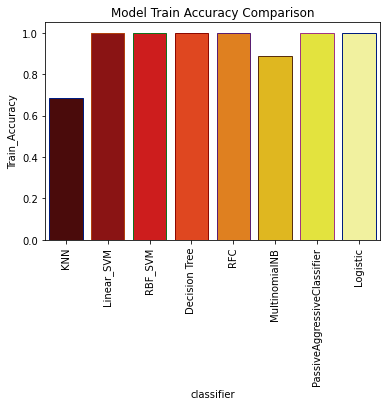

In [ ]:
import seaborn as sns
sns.barplot(x='classifier',y='Train_Accuracy',data=DF,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Train Accuracy Comparison')

Text(0.5, 1.0, 'Model Test Accuracy Comparison')

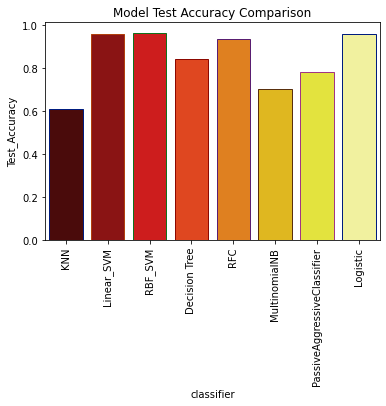

In [ ]:
import seaborn as sns
sns.barplot(x='classifier',y='Test_Accuracy',data=DF,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Test Accuracy Comparison')

Text(0.5, 1.0, 'Model Precision Comparison')

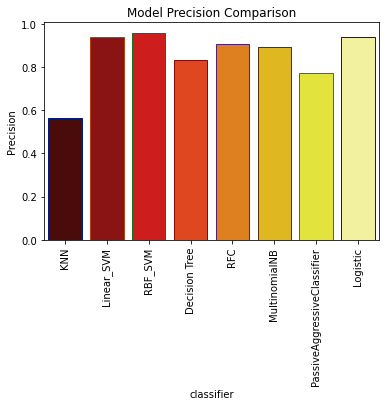

In [ ]:
import seaborn as sns
sns.barplot(x='classifier',y='Precision',data=DF,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Precision Comparison')

Text(0.5, 1.0, 'Model recall Comparison')

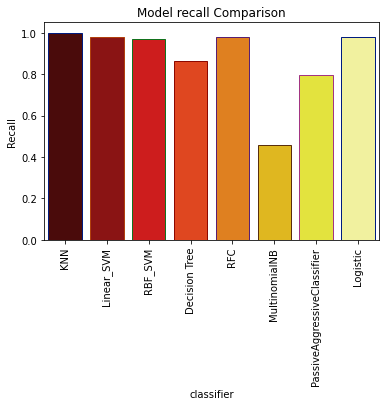

In [ ]:
import seaborn as sns
sns.barplot(x='classifier',y='Recall',data=DF,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model recall Comparison')

In [ ]:
d={'fontfamily':'monospace','fontweight':'bold','fontsize':"x-large"}

Text(0.5, 1.0, 'classifier vs Train_Accuracy,Test_Accuracy\nPrecision and Recall')

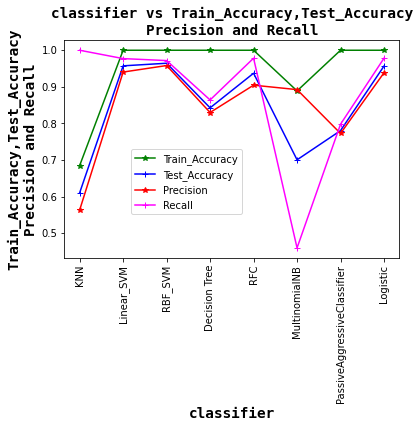

In [ ]:
plt.plot(DF.classifier,DF.Train_Accuracy,marker="*",color='green',label='Train_Accuracy')
plt.plot(DF.classifier,DF.Test_Accuracy,marker="+",color='blue',label='Test_Accuracy')
plt.plot(DF.classifier,DF.Precision,marker="*",color='red',label='Precision')
plt.plot(DF.classifier,DF.Recall,marker="+",color='magenta',label='Recall')
plt.ylabel('Train_Accuracy,Test_Accuracy\nPrecision and Recall',fontdict=d)
plt.xlabel('classifier',fontdict=d)
plt.legend(loc=[0.2,0.2])
plt.xticks(rotation=90)
plt.title('classifier vs Train_Accuracy,Test_Accuracy\nPrecision and Recall',fontdict=d)

In [ ]:
DF.describe()

,Train_Accuracy,Test_Accuracy,Precision,Recall,f1
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.946721,0.843716,0.849981,0.878397,0.847566
std,0.112717,0.135220,0.131484,0.183278,0.133476
min,0.684882,0.610383,0.563380,0.459783,0.606887
25%,0.972222,0.760383,0.815548,0.847554,0.768950
50%,1.000000,0.889891,0.898464,0.974457,0.893297
75%,1.000000,0.956967,0.938952,0.978261,0.958073
max,1.000000,0.964481,0.958199,1.000000,0.964922


In [ ]:
df

,text,label,clean_text
0,"PALO ALTO, Calif. — After years of scorning the political process, Silicon Valley has leapt i...",0,"[palo, alto, calif, year, scorning, political, process, silicon, valley, leapt, fray, prospect, ..."
2,"Videos #NoDAPL: Native American Leaders Vow to Stay All Winter, File Lawsuit Against Police Amne...",0,"[video, nodapl, native, american, leader, vow, stay, winter, file, lawsuit, police, amnesty, int..."
3,"If at first you don’t succeed, try a different sport. Tim Tebow, who was a Heisman quarterback...",1,"[first, succeed, try, different, sport, tim, tebow, heisman, quarterback, university, florida, u..."
4,"42 mins ago 1 Views 0 Comments 0 Likes 'For the first time in history, we’re filming a panoramic...",1,"[42, min, ago, 1, view, 0, comment, 0, like, first, time, history, filming, panoramic, video, st..."
6,"Sunday on NBC’s “Meet the Press,” House Minority Leader Rep. Nancy Pelosi ( ) called for a FBI ...",1,"[sunday, nbc, meet, press, house, minority, leader, rep, nancy, pelosi, called, fbi, investigati..."
...,...,...,...
5194,"Pres. Trump on if “tapes” exist of his conversations with Comey: ”Well, I’ll tell you about that...",1,"[pres, trump, tape, exist, conversation, comey, well, tell, maybe, sometime, near, future, pic, ..."
5195,"Of all the dysfunctions that plague the world’s megacities, none may be more pernicious than bad...",0,"[dysfunction, plague, world, megacities, none, may, pernicious, bad, really, really, bad, traffi..."
5196,WASHINGTON — Gov. John Kasich of Ohio on Tuesday signed into law a ban on abortion after 20 w...,1,"[washington, gov, john, kasich, ohio, tuesday, signed, law, ban, abortion, 20, week, pregnancy, ..."
5197,"Good morning. (Want to get California Today by email? Here’s the .) JoAnna Klein, a science wri...",0,"[good, morning, want, get, california, today, email, joanna, klein, science, writer, brings, u, ..."


In [ ]:
DF.to_excel('/content/grieve/MyDrive/Colab Notebooks/df1.xlsx',sheet_name="aman",startrow=2,startcol=5)

([<matplotlib.patches.Wedge at 0x7f63ba6cc640>,
 [Text(-0.05624950082254221, 1.098560873896943, 'fake'),
  Text(0.05624950082254232, -1.098560873896943, 'true')],
 [Text(-0.03068154590320484, 0.5992150221256052, '51.63'),
  Text(0.030681545903204897, -0.5992150221256052, '48.37')])

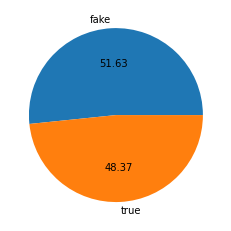

In [ ]:
plt.pie(df.label.value_counts(),labels=['fake','true'],autopct="%0.2f")

In [ ]:
import string as str